In [1]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset
dataset=pd.read_csv("/content/sample_data/Ads_CTR_Optimisation.csv")

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [9]:
import math
N=10000
d=10
number_of_selected_ads=[0]*d
sum_of_rewards=[0]*d
ads_selected=[]
total_reward=0

In [14]:
for n in range(N):
  ad=0
  max_upper_bound=0
  for i in range(d):
    if (number_of_selected_ads[i]>0):
      avg_reward=sum_of_rewards[i]/number_of_selected_ads[i]
      delta=math.sqrt((1.5*math.log(n+1))/number_of_selected_ads[i])
      upper_bound=avg_reward+delta
    else:
      upper_bound=1e400
    if (upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
    ads_selected.append(ad)
    number_of_selected_ads[ad]=number_of_selected_ads[ad]+1
    reward=dataset.values[n,ad]
    sum_of_rewards[ad]=sum_of_rewards[ad]+reward
    total_reward=total_reward+reward

<BarContainer object of 10 artists>

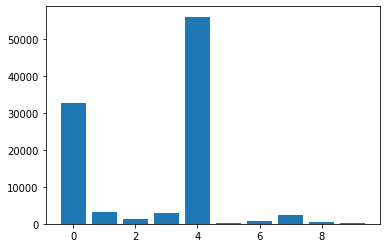

In [17]:
d={}
for i in ads_selected:
  d[i]=ads_selected.count(i)
plt.bar(d.keys(),d.values())